In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import clear_output
import cv2
%matplotlib inline

In [2]:
from src.utils import *
from src.MOSSE import *
from src.KCF import *

In [3]:
FRAME_DIR = './UAV123_10fps/data_seq/UAV123_10fps/bike1'
ANNOT_PATH = './UAV123_10fps/anno/UAV123_10fps/bike1.txt'

In [8]:
##################### SELECT ALGORITHM #######################

KCF_HOG = KCF(features = 'hog', kernel = 'gaussian')
DCF_HOG = KCF(features = 'hog', kernel = 'linear')
KCF_RAW = KCF(features = 'color', kernel = 'gaussian')
DCF_RAW= KCF(features = 'color', kernel = 'linear')
MO = MOSSE()


MODEL = KCF_RAW

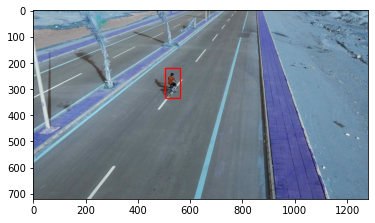

KeyboardInterrupt: 

In [9]:
bbox = np.genfromtxt(ANNOT_PATH, dtype=int, delimiter=',', names=True)[0]
frame_path = FRAME_DIR+ '/' + sorted(os.listdir(FRAME_DIR))[0]


first_frame = cv2.imread(frame_path)
first_frame = first_frame.astype(np.float32)


MODEL.initialization(first_frame,bbox)


previous_frame = first_frame


for i, path in enumerate(sorted(os.listdir(FRAME_DIR))[1:]):
    
    frame_path = FRAME_DIR+ '/' + path
    
    frame = cv2.imread(frame_path)

    x1, y1, x2, y2 = MODEL.track(frame)
    
    # visualize the tracking process...
    clear_output(wait=True)
    cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), thickness=3)
    plt.imshow(frame)
    plt.show()